<div>
    <h1 align="center" style="color:darkcyan;">AUC & Ensembling</h1>
    <h1 align="center" style="color:darkcyan;">Tabular Playground Series - May 2022</h1>   
</div>

<div class="alert alert-success">  
</div>

#### Great public notebooks for this month. Thanks to everyone who published these notebooks. In particular: @ambrosm , @alexryzhkov , @dlaststark , @hiro5299834 , @kellibelcher , ...

#### For this reason, and given that the evaluation of this challenge is based on "AUC", I also decided to mention just a few important points regarding "Ensembling". I hope it is useful.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import warnings
warnings.filterwarnings('ignore')

!ls ../input/*

../input/99813tps22may:
99813TPS22MAY.csv

../input/99814tps22may:
99814TPS22MAY.csv

../input/99822tps22may:
99822TPS22MAY.csv

../input/tabular-playground-series-may-2022:
sample_submission.csv  test.csv  train.csv


<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Evaluation: "ROC_AUC"</span>

#### Submissions are evaluated on area under the **ROC curve** between the predicted probability and the observed target.

<img src="https://raw.githubusercontent.com/MehranKazeminia/fifa-worldcup-2018/master/roc600.png">

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [4]:
def roc_auc(true_list, pred_list, a, b):
    
    fpr, tpr, _ = roc_curve(true_list, pred_list)    
    roc_auc = auc(fpr, tpr)

    print(f'FPR: {fpr}')
    print(f'TPR: {tpr}')
    print(f'{list(zip(fpr,tpr))}') 
    print(f'\n>>>>> ROC_AUC: %0.6f <<<<<\n' %roc_auc)
    
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(a, b), facecolor='lightgray')
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'\nThe area under the ROC curve\n')
    plt.legend(loc="lower right")
    plt.show()

FPR: [0.  0.  0.4 1. ]
TPR: [0.  0.6 1.  1. ]
[(0.0, 0.0), (0.0, 0.6), (0.4, 1.0), (1.0, 1.0)]

>>>>> ROC_AUC: 0.920000 <<<<<



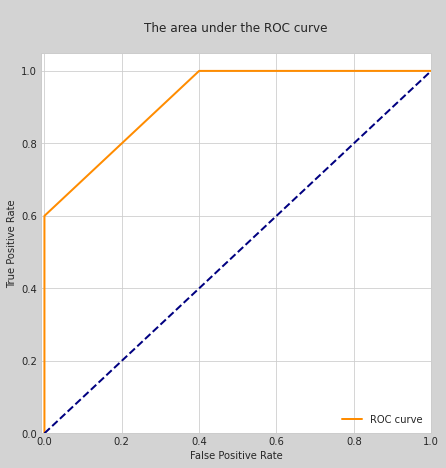

In [5]:
# Sample-1
true_list = np.array([1.0, 1.0, 1.0, 1.0, 1.0,      0.0, 0.0, 0.0, 0.0, 0.0])
pred_list = np.array([1.0, 1.0, 1.0, 0.5, 0.5,      0.0, 0.0, 0.0, 0.5, 0.5])

roc_auc(true_list, pred_list, 7, 7)

FPR: [0.  0.  0.  0.4 1. ]
TPR: [0.  0.2 0.6 1.  1. ]
[(0.0, 0.0), (0.0, 0.2), (0.0, 0.6), (0.4, 1.0), (1.0, 1.0)]

>>>>> ROC_AUC: 0.920000 <<<<<



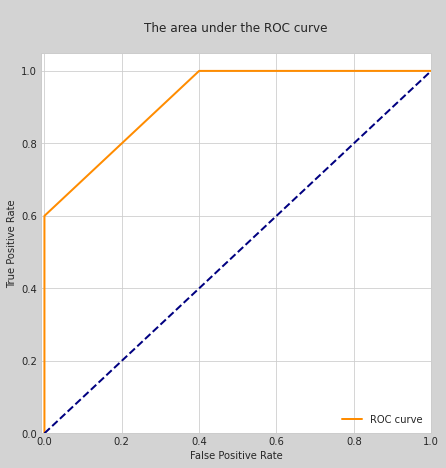

In [6]:
# Sample-2
true_list = np.array([1.0, 1.0, 1.0, 1.0, 1.0,      0.0, 0.0, 0.0, 0.0, 0.0])
pred_list = np.array([0.8, 120, 0.6, 0.5, 0.5,      0.4, -12, 0.1, 0.5, 0.5])

roc_auc(true_list, pred_list, 7, 7)

### **If you compare example one and example two, you will notice that:**
#### In this evaluation; The values "ROC_AUC" for completely different predictions can be equal. 
#### In the real world, you have to be careful. This should also be taken into account when "Ensembling".
### **What does this mean and why?**

![](https://miro.medium.com/max/1400/1*foMOQk2yPp745FTxhL8SCg.gif)
- Image by: [Amine Aoullay](https://towardsdatascience.com/choosing-the-right-metric-is-a-huge-issue-99ccbe73de61) 

#### You can see how to draw the ROC curve above. But let's see what happens when the overlap percentage increases or decreases:

![](https://miro.medium.com/max/1400/1*8F-fY3zanGzYeCX0NlN2MQ.gif)
- Image by: [Amine Aoullay](https://towardsdatascience.com/choosing-the-right-metric-is-a-huge-issue-99ccbe73de61) 

#### The less overlap, the fewer errors and the further the ROC curve moves up and left. Therefore, the better you separate your classes, the higher AUC will go. 

#### In other words, AUC doesn’t care about absolute values, it only cares about ranking. You just need to well seperate your classes the get a high AUC.

### **So let's not forget that: The target metric in this competition is based on ranks rather than on actual values. That means that as long as the order of your values is fixed, the metric will stay the same.**

<div class="alert alert-success">  
</div>

#### For more information, refer to the following address:

#### [Learning from imbalanced data.](http://www.jeremyjordan.me/imbalanced-data/)

![](https://www.jeremyjordan.me/content/images/2018/11/roc_cutoff-1.gif)

<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Data-Sets</span>

In [7]:
import datatable as dt 

DF1 = dt.fread('../input/tabular-playground-series-may-2022/train.csv').to_pandas()
DF2 = dt.fread('../input/tabular-playground-series-may-2022/test.csv').to_pandas()
SAM = dt.fread('../input/tabular-playground-series-may-2022/sample_submission.csv').to_pandas()

display(DF1.shape, DF2.shape, SAM.shape)

(900000, 33)

(700000, 32)

(700000, 2)

In [8]:
hist_data = [DF1['target']]  
group_labels = ['y']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

DF1['target']

0         False
1          True
2          True
3          True
4          True
          ...  
899995     True
899996    False
899997    False
899998    False
899999     True
Name: target, Length: 900000, dtype: bool

<div class="alert alert-success">  
</div>

#### Thanks to: @dlaststark
#### https://www.kaggle.com/code/dlaststark/tps-may22-what-tf-again

In [9]:
s99813 = pd.read_csv('../input/99813tps22may/99813TPS22MAY.csv')

hist_data = [s99813['target']]  
group_labels = ['s99813']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

s99813 , s99813['target'].min() , s99813['target'].max()

(             id    target
 0        900000  0.868314
 1        900001  0.799507
 2        900002  0.022346
 3        900003  0.215414
 4        900004  0.795349
 ...         ...       ...
 699995  1599995  0.527570
 699996  1599996  0.797701
 699997  1599997  0.433296
 699998  1599998  0.127445
 699999  1599999  0.002802
 
 [700000 rows x 2 columns],
 0.0002421013877306,
 1.0)

<div class="alert alert-success">  
</div>

#### Thanks to: @alexryzhkov
#### https://www.kaggle.com/code/alexryzhkov/tps-may-22-lightautoml-here-again

In [10]:
s99814 = pd.read_csv('../input/99814tps22may/99814TPS22MAY.csv')

hist_data = [s99814['target']]  
group_labels = ['s99814']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

s99814 , s99814['target'].min() , s99814['target'].max()

(             id    target
 0        900000  0.999869
 1        900001  0.999682
 2        900002  0.000103
 3        900003  0.000327
 4        900004  0.999402
 ...         ...       ...
 699995  1599995  0.521320
 699996  1599996  0.999683
 699997  1599997  0.022299
 699998  1599998  0.000235
 699999  1599999  0.000125
 
 [700000 rows x 2 columns],
 6.5523716e-05,
 0.9999296)

<div class="alert alert-success">  
</div>

#### Thanks to: @ambrosm
#### https://www.kaggle.com/code/ambrosm/tpsmay22-advanced-keras

In [11]:
s99822 = pd.read_csv('../input/99822tps22may/99822TPS22MAY.csv')

hist_data = [s99822['target']]  
group_labels = ['s99822']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

s99822 , s99822['target'].min() , s99822['target'].max()

(             id     target
 0        900000  573655.75
 1        900001  604761.75
 2        900002   18319.10
 3        900003  139846.65
 4        900004  474807.65
 ...         ...        ...
 699995  1599995  358903.40
 699996  1599996  561605.55
 699997  1599997  304999.15
 699998  1599998  139925.25
 699999  1599999    1933.20
 
 [700000 rows x 2 columns],
 297.9,
 683747.05)

### **<span style="color:darkred;">Note:</span>**

#### The result of this notebook is the ranking of actual values. So we should not use rankdata() again :)

<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Ensembling with Rankdata</span>

#### For this step, we use the results of three excellent notebooks.

In [12]:
def gen_plt(main, support, generated):
    X  = main
    Y1 = support
    Y2 = generated
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nE N S E M B L I N G\n')   
      
    plt.scatter(X, Y1, s=2.5, label='Support')    
    plt.scatter(X, Y2, s=2.5, label='Generated')
    plt.scatter(X, X , s=0.2, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    # plt.savefig('Ensembling_1.png')
    plt.show()

In [13]:
Rs99813 = stats.rankdata(s99813['target'])
Rs99813 , len(Rs99813)

(array([5.95101e+05, 5.44120e+05, 8.94700e+03, ..., 3.01217e+05,
        8.58630e+04, 3.25000e+02]),
 700000)

In [14]:
Rs99814 = stats.rankdata(s99814['target'])
Rs99814 , len(Rs99814)

(array([664513., 585493.,   8370., ..., 311409.,  69969.,  26973.]), 700000)

In [15]:
Rs99822 = s99822['target'].values
Rs99822 , len(Rs99822)

(array([573655.75, 604761.75,  18319.1 , ..., 304999.15, 139925.25,
          1933.2 ]),
 700000)

### **<span style="color:darkred;">^^^^^ Do not use rankdata()</span>**


<div class="alert alert-success">  
</div>

### **<span style="color:darkred;">Note:</span>**

#### Change the coefficients so that you may have better results. :)

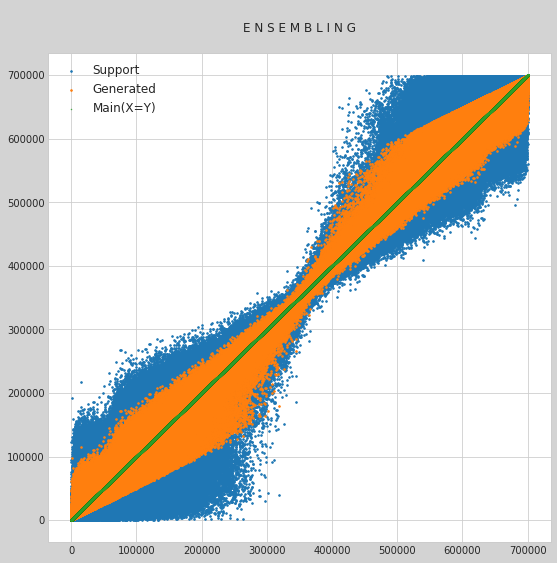

(             id     target
 0        900000  629807.00
 1        900001  564806.50
 2        900002    8658.50
 3        900003  136032.75
 4        900004  523716.75
 ...         ...        ...
 699995  1599995  361805.00
 699996  1599996  564571.75
 699997  1599997  306313.00
 699998  1599998   77916.00
 699999  1599999   13649.00
 
 [700000 rows x 2 columns],
 39.5,
 699224.75)

In [16]:
sub1 = SAM.copy()
sub1['target'] = (Rs99814 * 0.50) + (Rs99813 * 0.50)

gen_plt(Rs99814, Rs99813, sub1['target'])
sub1 , sub1['target'].min() , sub1['target'].max()
# Public Score: 0.99821

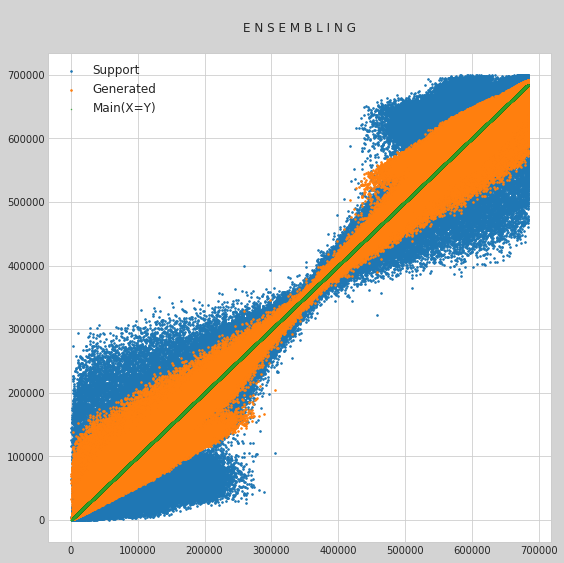

(             id      target
 0        900000  601731.375
 1        900001  584784.125
 2        900002   13488.800
 3        900003  137939.700
 4        900004  499262.200
 ...         ...         ...
 699995  1599995  360354.200
 699996  1599996  563088.650
 699997  1599997  305656.075
 699998  1599998  108920.625
 699999  1599999    7791.100
 
 [700000 rows x 2 columns],
 1099.85,
 691484.15)

In [17]:
sub2 = SAM.copy()
sub2['target'] = (Rs99822 * 0.50) + (sub1['target'] * 0.50)

gen_plt(Rs99822, sub1['target'], sub2['target'])
sub2 , sub2['target'].min() , sub2['target'].max()
# Public Score: 0.99827

In [18]:
sub3 = SAM.copy()
sub3['target'] = np.clip(sub2['target'], 100000, 600000)
sub3 , sub3['target'].min() , sub3['target'].max()

(             id      target
 0        900000  600000.000
 1        900001  584784.125
 2        900002  100000.000
 3        900003  137939.700
 4        900004  499262.200
 ...         ...         ...
 699995  1599995  360354.200
 699996  1599996  563088.650
 699997  1599997  305656.075
 699998  1599998  108920.625
 699999  1599999  100000.000
 
 [700000 rows x 2 columns],
 100000.0,
 600000.0)

### **<span style="color:darkred;">Note:</span>**

#### It is not necessary to use np.clip ()

In [19]:
hist_data = [sub3['target'] ,sub2['target'] , sub1['target']]  
group_labels = ['sub3' , 'sub2' , 'sub1']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

In [20]:
sub1.to_csv("sub1.csv", index=False)
sub2.to_csv("sub2.csv", index=False)

sub3.to_csv("submission.csv", index=False)
!ls

__notebook__.ipynb  sub1.csv  sub2.csv	submission.csv


<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Ensembling with Power</span>

#### Another method is to use power for "Ensembling". We know that if we increase the numbers between zero and one to the power of two or four, etc., these numbers will shrink and will have certain distances from each other. The same thing (only in some cases) can lead to a good "Ensemble". Of course, this method is boring in my opinion and relies more on luck. For this reason, in the following, I will only describe how to do this and I will not do "Submit" and ....

In [21]:
def norm_list(main): 
    
    n   = main.copy()
    nv  = n.values
    min_nv = min(nv[:, 1])
    max_nv = max(nv[:, 1])

    norm  = main.copy()    
    normv = norm.values 
    
    for i in range (len(main)):
        nvn = (nv[i, 1] - min_nv) / (max_nv - min_nv)
        normv[i, 1] = nvn
        
    norm.iloc[:, 1] = normv[:, 1]
    return norm

In [22]:
# Determine the power:)
POWER = 2  # 2 OR 4 OR 8 OR ...

In [23]:
Ps99813 = s99813.target**POWER
Ps99813 

0         0.753970
1         0.639212
2         0.000499
3         0.046403
4         0.632580
            ...   
699995    0.278330
699996    0.636327
699997    0.187746
699998    0.016242
699999    0.000008
Name: target, Length: 700000, dtype: float64

In [24]:
Ps99814 = s99814.target**POWER
Ps99814 

0         9.997376e-01
1         9.993632e-01
2         1.054652e-08
3         1.071073e-07
4         9.988045e-01
              ...     
699995    2.717747e-01
699996    9.993653e-01
699997    4.972414e-04
699998    5.536842e-08
699999    1.565312e-08
Name: target, Length: 700000, dtype: float64

In [25]:
Ns99822 = norm_list(s99822)
Ns99822 , Ns99822['target'].min() , Ns99822['target'].max()

(             id    target
 0        900000  0.838918
 1        900001  0.884431
 2        900002  0.026368
 3        900003  0.204183
 4        900004  0.694287
 ...         ...       ...
 699995  1599995  0.524700
 699996  1599996  0.821287
 699997  1599997  0.445829
 699998  1599998  0.204298
 699999  1599999  0.002393
 
 [700000 rows x 2 columns],
 0.0,
 1.0)

### **<span style="color:darkred;">Note:</span>**

#### We need to normalize the results of this particular notebook so that all values are between zero and one.

In [26]:
Ps99822 = Ns99822.target**POWER
Ps99822 

0         0.703784
1         0.782219
2         0.000695
3         0.041691
4         0.482034
            ...   
699995    0.275310
699996    0.674512
699997    0.198763
699998    0.041738
699999    0.000006
Name: target, Length: 700000, dtype: float64

<div class="alert alert-success">  
</div>

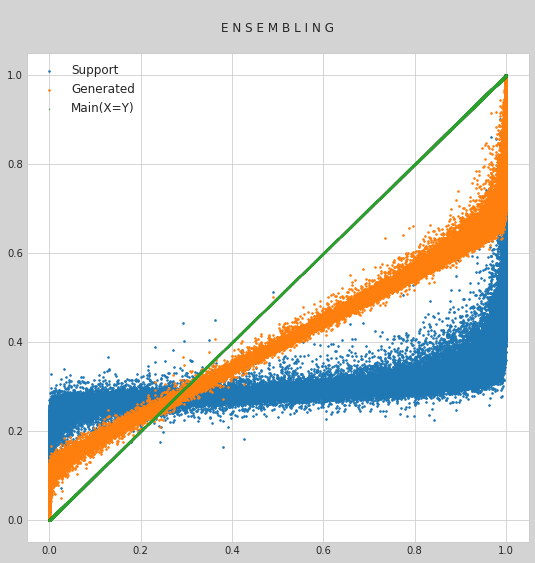

(             id    target
 0        900000  0.876854
 1        900001  0.819288
 2        900002  0.000250
 3        900003  0.023202
 4        900004  0.815692
 ...         ...       ...
 699995  1599995  0.275052
 699996  1599996  0.817846
 699997  1599997  0.094122
 699998  1599998  0.008121
 699999  1599999  0.000004
 
 [700000 rows x 2 columns],
 3.459094157146897e-08,
 0.99992180305762)

In [27]:
subp1 = SAM.copy()
subp1['target'] = (Ps99814 * 0.50) + (Ps99813 * 0.50)

gen_plt(Ps99814, Ps99813, subp1['target'])
subp1 , subp1['target'].min() , subp1['target'].max()

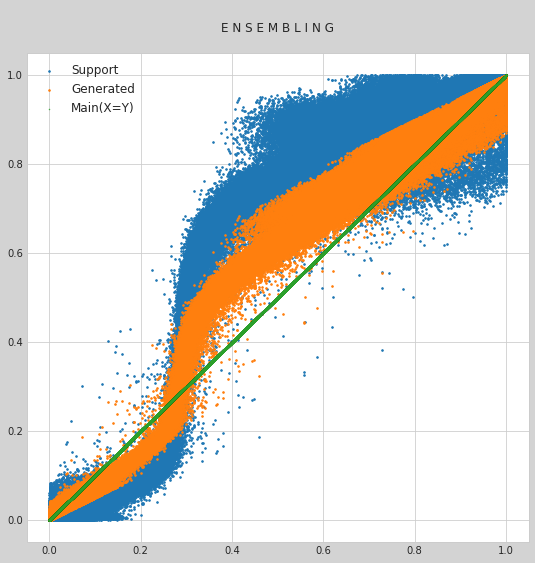

(             id    target
 0        900000  0.790319
 1        900001  0.800753
 2        900002  0.000472
 3        900003  0.032446
 4        900004  0.648863
 ...         ...       ...
 699995  1599995  0.275181
 699996  1599996  0.746179
 699997  1599997  0.146442
 699998  1599998  0.024929
 699999  1599999  0.000005
 
 [700000 rows x 2 columns],
 7.135721502588517e-07,
 0.9999600016)

In [28]:
subp2 = SAM.copy()
subp2['target'] = (Ps99822 * 0.50) + (subp1['target'] * 0.50)

gen_plt(Ps99822, subp1['target'], subp2['target'])
subp2 , subp2['target'].min() , subp2['target'].max()

In [29]:
hist_data = [subp2['target'] , subp1['target']]  
group_labels = ['subp2' , 'subp1']
    
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2, show_hist=False, show_rug=False) 
fig.show()

In [30]:
# subp1.to_csv("subp1.csv", index=False)
# subp2.to_csv("subp2.csv", index=False)
# !ls

<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>

# <span style="color:darkcyan;">Good Luck.</span>